In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

key = 'AR_R4'
table = 'kmerTableDivide.csv'

In [2]:
seqToAff = {}
allSeqs = []
allAffs = []
firstLine = True
with open("results/"+key+"/"+table) as inp:
    for line in inp:
        if firstLine:
            firstLine = False
            continue
        row = line.strip().split(',')
        if 'symmetric' in table and int(row[2]) == 0: continue
        seq = row[1][1:-1].upper()
        aff = float(row[-2])
        allSeqs.append(seq)
        allAffs.append(aff)
        seqToAff[seq] = aff
allSeqs = np.array(allSeqs)
allAffs = np.array(allAffs)

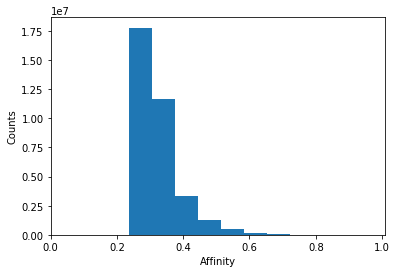

In [6]:
plt.hist(allAffs, density=False, bins=11)
plt.ylabel('Counts')
plt.xlabel('Affinity')
plt.xlim((0,1.01))
plt.show()

In [7]:
def sampleFromBins(allAffs, allSeqs):
    bins = np.linspace(np.min(allAffs), 1.001, 11)
    digitized = np.digitize(allAffs, bins)
    num_seqs = 1000
    sampled_keys = []
    curr_bin = 10
    curr_size = math.ceil(num_seqs/curr_bin)
    while num_seqs > 0 and curr_bin > 0:
        print(num_seqs, curr_bin, curr_size)
        large_basket = allSeqs[digitized == curr_bin]
        sample_size = min(curr_size, len(large_basket))
        sampled_keys.append(np.random.choice(large_basket, sample_size, replace=False))
        num_seqs -= sample_size
        curr_bin -= 1
        if curr_bin != 0: curr_size = math.ceil(num_seqs/curr_bin)
    sampled_keys = np.concatenate(np.array(sampled_keys))
    return sampled_keys

1000 10 100
989 9 110
969 8 122
847 7 121
726 6 121
605 5 121
484 4 121
363 3 121
242 2 121
121 1 121


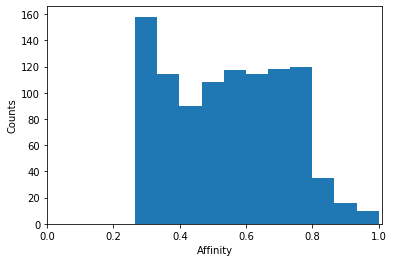

In [8]:
keys = sampleFromBins(allAffs, allSeqs)
affs = []
for seq in keys: affs.append(seqToAff[seq])
plt.hist(affs, density=False, bins=11)
plt.ylabel('Counts')
plt.xlabel('Affinity')
plt.xlim((0,1.01))
plt.show()

In [9]:
keys.shape

(1000,)